In [160]:
import matplotlib.pyplot as plt

from main import *

In [162]:
 ### Automated Serial Analysis
SAMPLES = 1000
specs = {
    "MAXROUNDS": 1000,
    "THRESHOLD": 16,
    "DRAW_STRATEGY": "DecisionTable", # Manual, Threshold, DecisionTable
    "BET_STRATEGY": "HiLo", # Constant, HiOpt, HiLo, Omega, Halves
    "DECKS": 4  ,
    "LOG": False,
    "LOGRESULTS": False,
    "PLOT": False,
}
pool = mp.Pool()
data_for_samples = pool.map(proxylauncher, [{**specs, "sid": sid + 1} for sid in range(SAMPLES)])
df = pd.DataFrame(data_for_samples)

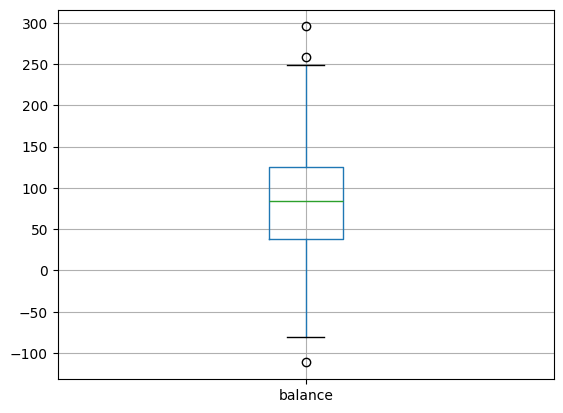

,wlr,balance
count,1000.000000,1000.000000
mean,0.930244,81.056000
std,0.061449,60.585547


In [163]:
# data_for_samples[0].keys()
df.boxplot(["balance"])
plt.show()
df.describe()[["wlr","balance"]].head(3)

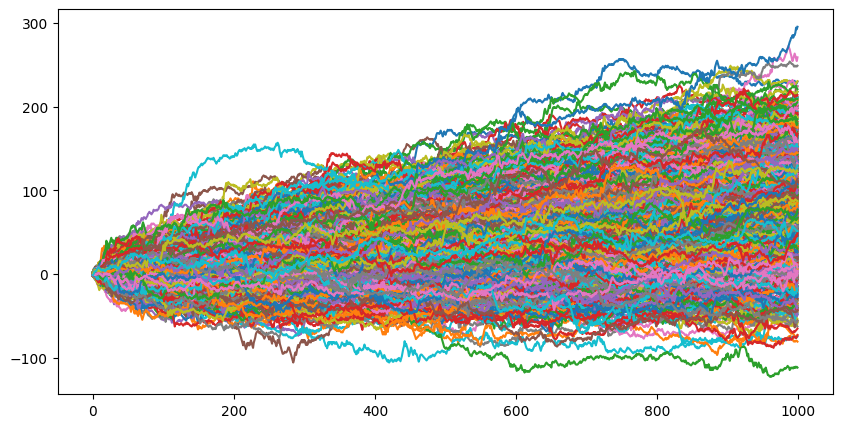

In [164]:
fig, ax = plt.subplots(figsize=(10,5))
arr = np.array(df["balanceprogress"].tolist())
for sample in arr:
    plt.plot(sample)
plt.show()

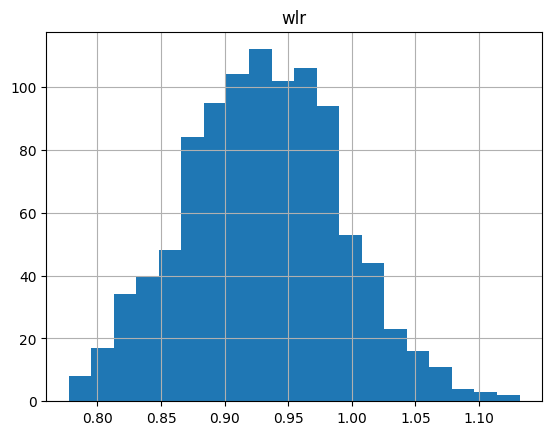

In [165]:
df.hist(column=["wlr"],bins=20)
plt.show()

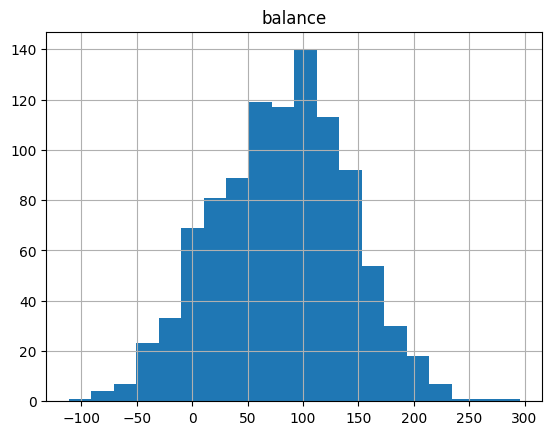

In [166]:
df.hist(column=["balance"],bins=20)
plt.show()

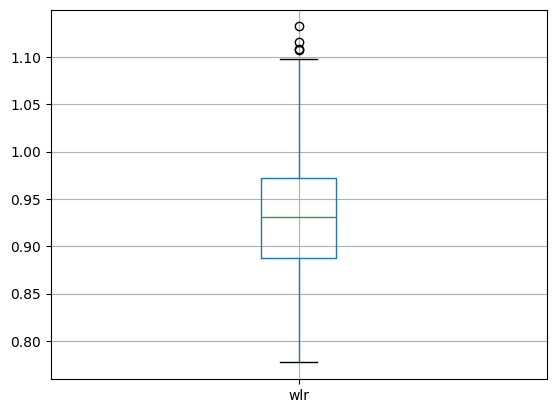

In [167]:
df.boxplot(["wlr"])
plt.show()

['wlr', 'balance', 'win_by_blackjack', 'win_by_bust', 'win_by_comparison', 'tie', 'lose_by_blackjack', 'lose_by_bust', 'lose_by_comparison', 'balanceprogress']


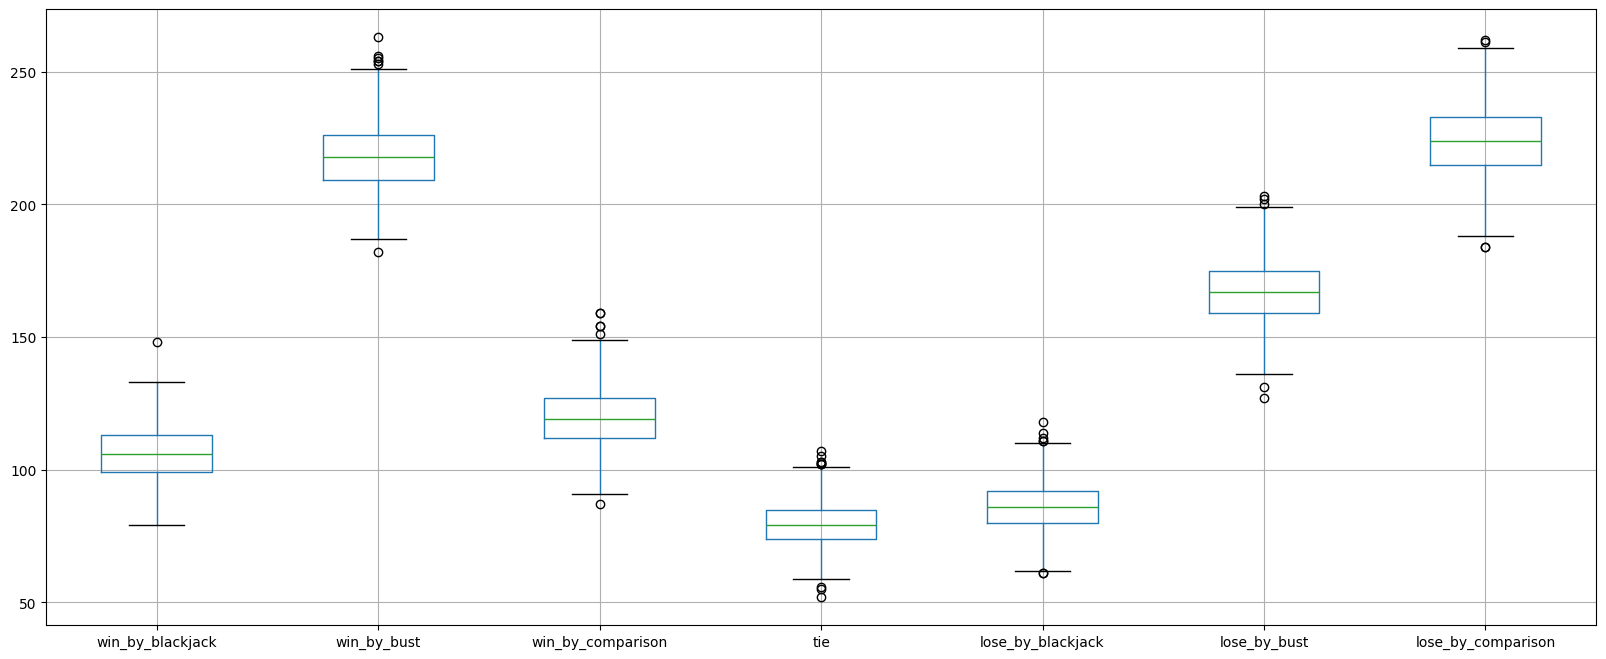

In [168]:
cols = list(df.columns)
df.boxplot([x for x in cols if "lose" in x or "win" in x or "tie" in x],figsize=(20,8))
print(cols)
plt.show()
